# Tarea Regresión Lineal

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol
from sympy import *
from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


https://pythonforundergradengineers.com/sympy-expressions-and-equations.html
http://research.iac.es/sieinvens/python-course/source/sympy.html

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

$$ \textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

$$
\hat{\textbf{y}} = \mathbf\beta_0 + \mathbf\beta_1 \textbf{x}
$$

$$ \sum_{(x^{(i)}, y^{(i)}) \in X \times Y} = \sum_{i = 1}^{n} $$

In [2]:
J = Function("J")
b0 = Symbol("beta0")
b1 = Symbol("beta1")
b = Symbol("beta")
n = Symbol ("n")
i = Symbol ("i")
x = IndexedBase('x')
y = IndexedBase('y')
k = Symbol ("k")
j = Symbol ("j")

a = 1 / (2*n)
suma = Sum((y[i]- b0 - b1*x[i])**2, (i,1,k))
eq = Eq(J(b0,b1), a * suma)

In [3]:
eq

Eq(J(beta0, beta1), Sum((-beta0 - beta1*x[i] + y[i])**2, (i, 1, k))/(2*n))

In [4]:
Derivative(eq.lhs,b0)

Derivative(J(beta0, beta1), beta0)

In [5]:
Derivative(eq.rhs,b0)

Derivative(Sum((-beta0 - beta1*x[i] + y[i])**2, (i, 1, k))/(2*n), beta0)

In [6]:
Derivative(eq.rhs,b0).doit()

Sum(2*beta0 + 2*beta1*x[i] - 2*y[i], (i, 1, k))/(2*n)

In [7]:
parcialb0 = simplify(Eq(Derivative(eq.lhs,b0),Derivative(eq.rhs,b0)).doit())

In [8]:
parcialb1 = simplify(Eq(Derivative(eq.lhs,b1),Derivative(eq.rhs,b1)).doit())

### Resultado

In [9]:
parcialb0

Eq(Derivative(J(beta0, beta1), beta0), Sum(beta0 + beta1*x[i] - y[i], (i, 1, k))/n)

In [10]:
parcialb1

Eq(Derivative(J(beta0, beta1), beta1), Sum((beta0 + beta1*x[i] - y[i])*x[i], (i, 1, k))/n)

## Funciones para problemas 2-5

In [5]:
class RegresionLineal:
    def __init__(self, alpha = 0.3, max_iters = 100, tols = 0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
    Vamos a ir iterando hasta que lleguemos al punto
    Si me paso de un número de iteraciones para, porque dejarás de hacerlo bien
    Tolerancia, el más cerca de cero que aceptarás.
        
        """
        
        # Características de la clase
        # Historia es para llevar un track
        # HERRAMIENTAS PARA DEFINIR CÓMO TRABAJARÁ EL ALGORTIMO
        
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
        
    ## EMPIEZA EL ALGORITMO
    
    def gradientDescent(self, x, y):
        """
    Definimos el descenso en gradiente con el par de vectores
        ¿Qué podemos hacer como validación de x y y?
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        # Hacemos una función de ceros
        # Hacemos un vector vertical
        # Concatenamos los unos para hacer los betas
        # y  = beta0 x0 + beta1 x1... Hacemos esto vertical
        # y = (beta 0, beta 1)T ...
        
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        # self beta es serie de ceros. 
        self.beta = np.zeros(n) 
        
        # No nos pasemos del máximo de iteraciones
        while i < self.max_iters:     
            # Actualizamos beta y le restamos alfa veces el gradiente
            # (1)
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
        #Sacamos el costo en general (2)
            J = self.costo(Xt, y)
            
            # Qué tanto nos interesa la presición
            # Convergencia se checa aquí. Mientras J - prep_J no llegue a la tolerancia.
        
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % (str(self.beta), i))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
        # Hay de 2, o llegamos a la máxima iteración o llegamos a casi a self.tols
        # Mientras más presición se pida, más se va a tardar
        
           #Actualizo 
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1            
            
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    
    # Aquí se calcula el costo
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

In [6]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    beta = rl.historia['beta'][iteracion]

    plt.figure(dpi=100)
    plt.subplot(1, 1, 1)
    
    plt.scatter(x,y, label="datos")
    plt.plot(x, modelo(x, beta[0], beta[1]), label="int: %1.2f, pen: %1.2f" % (beta[0], beta[1]))

## Problema 2

In [7]:
import matplotlib.pyplot as plt

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 



In [8]:
X = np.loadtxt('Data/edad.dat')
Y = np.loadtxt('Data/altura.dat')

def J(beta0, beta1):
    costo = 0
    for i in range(0, len(Y)):
        costo = costo + (Y[i]-beta0-beta1*X[i])**2/(2*len(Y))
    return costo

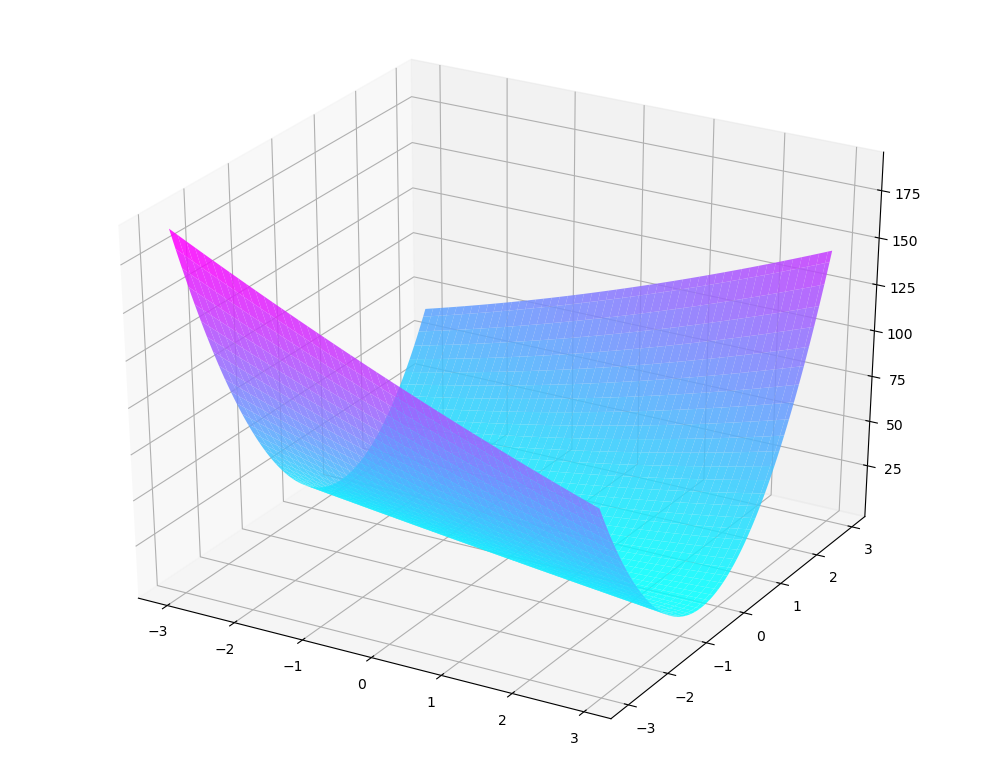

In [11]:
dx = 0.06
dy = 0.06

b0 = np.arange(-3,3,dx)
b1 = np.arange(-3,3,dy)
B0, B1 = np.meshgrid(b0,b1)
Costo = J(B0,B1)

graf = plt.figure(figsize=(12.5, 10), dpi= 100)
ax = graf.add_subplot(1,1,1,projection = '3d')
ax.plot_surface(B0,B1, Costo, cmap = 'cool', alpha = .85)

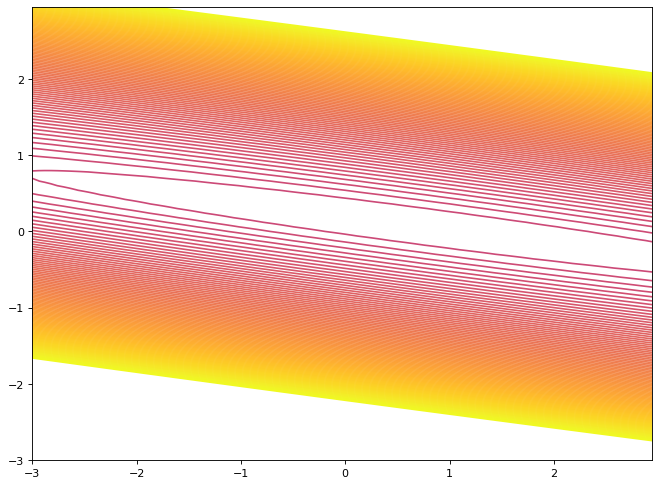

In [12]:
graf = plt.figure(figsize=(10, 7.5), dpi=80)
levels = np.arange(-80,80,0.8)
# Los datos de B0, B1, bajo la función de Costo con las limitaciones de levels.
plt.contour(B0,B1, Costo, levels, cmap = 'plasma')

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

In [13]:
reg = RegresionLineal(alpha=0.001, max_iters=10000000, tols= 0.000000000000001)
reg.gradientDescent(X, Y)

La función convergió con beta: [0.7501531  0.06388288] en la iteración 107796


In [14]:
#Coordenada de la z
cost = reg.historia['costo'][107795]
print(cost)

0.0009870699780745167


In [15]:
# Podríamos usar este pero es menos preciso. 
reg.beta

array([0.7501531 , 0.06388288])

In [16]:
# Coordenada de la x y la y
punto = [reg.historia['beta'][107795][0], reg.historia['beta'][107795][1]]
print(punto)

[0.750153095926002, 0.0638828835120439]


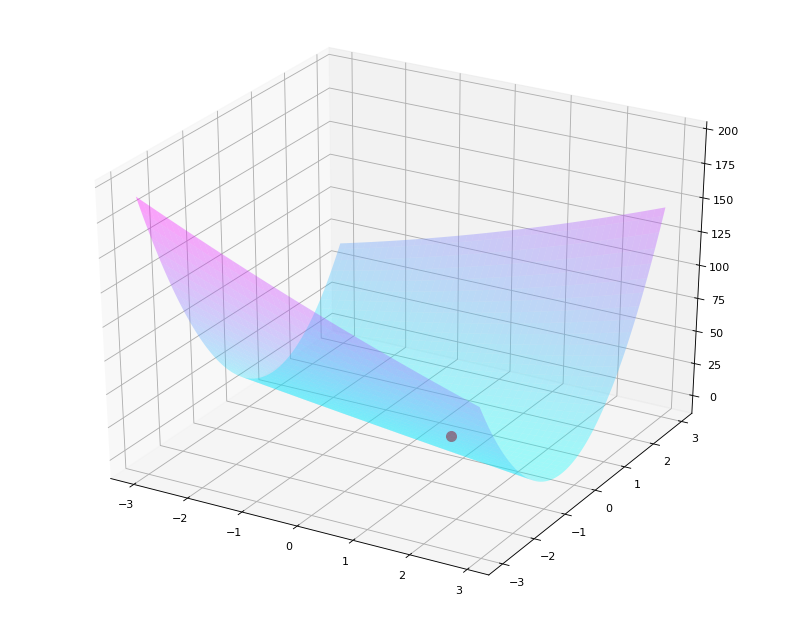

In [17]:
graf = plt.figure(figsize=(12.5, 10), dpi=80)
ax = graf.add_subplot(1,1,1, projection = '3d')
ax.plot_surface(B0,B1, Costo, cmap = 'cool', alpha = .35)

ax.scatter(punto[0], punto[1], cost, color = 'red', s = 80)

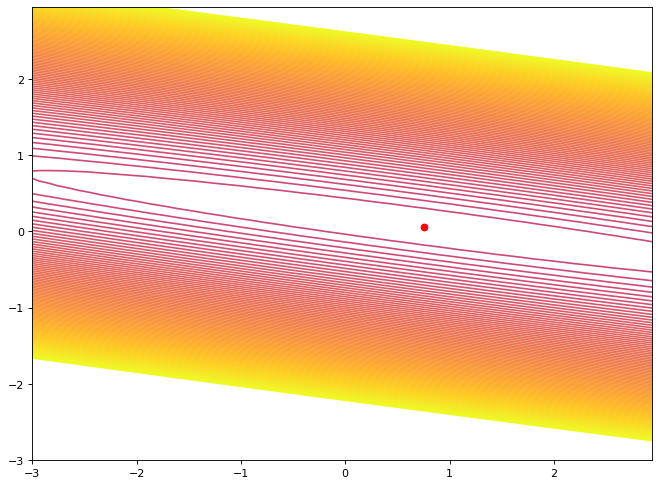

In [18]:
graf = plt.figure(figsize=(10, 7.5), dpi=80)
levels = np.arange(-80,80,0.8)
plt.contour(B0,B1, Costo, levels, cmap = 'plasma')
plt.scatter(punto[0], punto[1], color = 'red')

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

In [24]:
def Iteraciones(iteracion):
    
    graf = plt.figure(figsize=(10, 7.5), dpi=80)
    levels = np.arange(-80,80,0.8)
    plt.contour(B0,B1, Costo, levels, cmap = 'plasma',)
    plt.scatter(punto[0], punto[1], color = 'red', label = 'Mínimo establecido')
    plt.scatter(reg.historia['beta'][iteracion][0], reg.historia['beta'][iteracion][1], color = 'green', label = 'Interacción')
    plt.legend(loc = 'lower left')

ultimaiteracion = (reg.breaking_iteration - 1) if reg.breaking_iteration else (reeg.max_iters - 1)
interact(Iteraciones,x = fixed(X), y = fixed(Y), rl = fixed(reg), iteracion=(1, ultimaiteracion, 100));

interactive(children=(IntSlider(value=53801, description='iteracion', max=107795, min=1, step=100), Output()),…

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [25]:
def Alpha(alpha1):
    cambio = RegresionLineal(alpha = alpha1, max_iters=10000000, tols= 0.000000000000001)
    return cambio.gradientDescent(X, Y)

interact(Alpha, alpha1=(.0003,reg.alpha,.0001));

interactive(children=(FloatSlider(value=0.0006000000000000001, description='alpha1', max=0.001, min=0.0003, st…

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [26]:
%cat Data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Text(0, 0.5, 'Temperature')

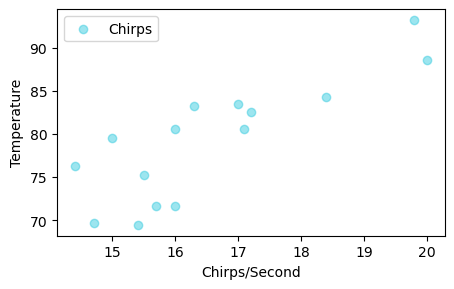

In [4]:
chrps, temp = np.loadtxt('Data/chirps.txt', unpack = True, dtype = float, delimiter=' ', usecols = [0,1])
plt.figure(figsize=(5,3), dpi=100)
plt.subplot(1, 1, 1)

plt.scatter(chrps, temp, color = (.23, .8, .88), alpha = .5, label = 'Chirps')
plt.legend(loc = 'upper left')
plt.xlabel('Chirps/Second')
plt.ylabel('Temperature')

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

In [28]:
chirps = RegresionLineal(alpha = 0.002, max_iters=1000000, tols=0.0000001)
chirps.gradientDescent(chrps, temp)

La función convergió con beta: [22.13191806  3.4531805 ] en la iteración 175192


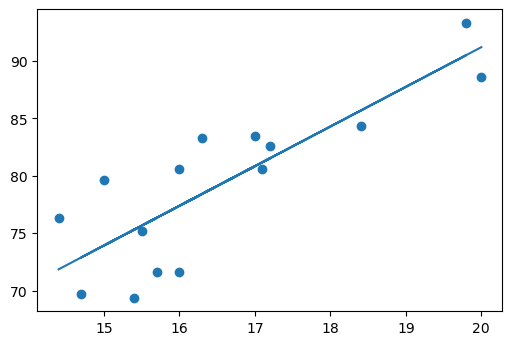

In [29]:
plotModelo(chrps, temp, chirps, 175191)

<img src="Data/Reg.png"/>


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [30]:
%%file Data/cuarteto.txt
10.0	8.04	10.0	9.14	10.0	7.46	8.0	6.58
8.0	6.95	8.0	8.14	8.0	6.77	8.0	5.76
13.0	7.58	13.0	8.74	13.0	12.74	8.0	7.71
9.0	8.81	9.0	8.77	9.0	7.11	8.0	8.84
11.0	8.33	11.0	9.26	11.0	7.81	8.0	8.47
14.0	9.96	14.0	8.10	14.0	8.84	8.0	7.04
6.0	7.24	6.0	6.13	6.0	6.08	8.0	5.25
4.0	4.26	4.0	3.10	4.0	5.39	19.0	12.50
12.0	10.84	12.0	9.13	12.0	8.15	8.0	5.56
7.0	4.82	7.0	7.26	7.0	6.42	8.0	7.91
5.0	5.68	5.0	4.74	5.0	5.73	8.0	6.89

Overwriting Data/cuarteto.txt


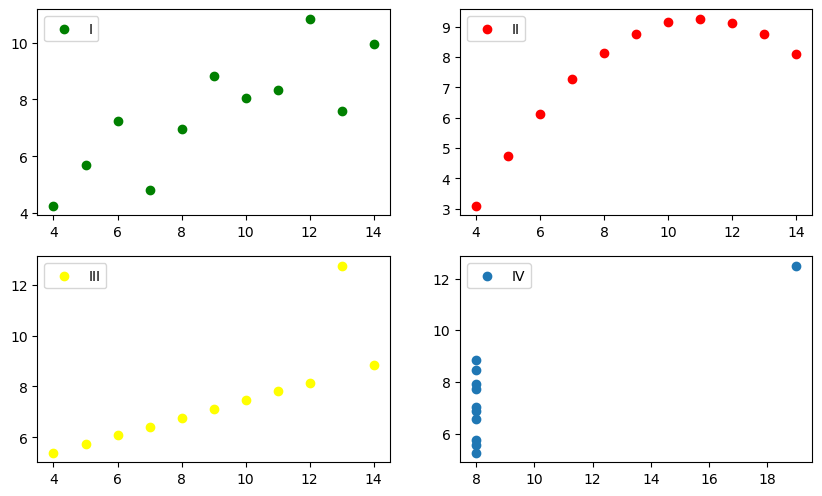

In [32]:
x1, y1, x2, y2, x3, y3, x4, y4 = np.loadtxt('Data/cuarteto.txt', unpack = True, dtype = float, delimiter='	', usecols = [0,1,2,3,4,5,6,7])
fig, ax = plt.subplots(2,2, figsize=(10,6), dpi = 100)

ax[0,0].scatter(x1,y1, label ='I', color = 'green') 
ax[0,1].scatter(x2,y2, label = 'II', color = 'red') 
ax[1,0].scatter(x3,y3, label = 'III', color = 'yellow')
ax[1,1].scatter(x4,y4, label = 'IV')

ax[0,0].legend(loc = 'upper left')
ax[0,1].legend(loc = 'upper left')
ax[1,0].legend(loc = 'upper left')
ax[1,1].legend(loc = 'upper left')


In [33]:
I = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
I.gradientDescent(x1, y1)

La función convergió con beta: [2.94731748 0.50531651] en la iteración 12292


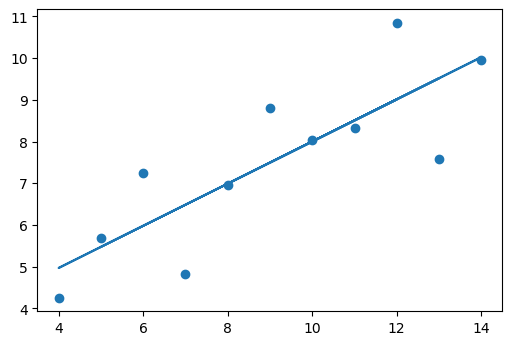

In [34]:
plotModelo(x1,y1,I,12291)

In [35]:
II = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
II.gradientDescent(x2, y2)

La función convergió con beta: [2.9481381  0.50522536] en la iteración 12293


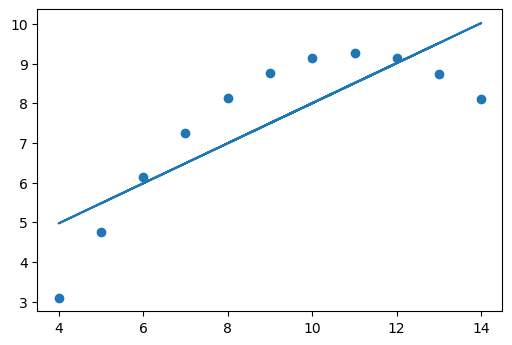

In [36]:
plotModelo(x2,y2,II,12292)

In [37]:
III = RegresionLineal(alpha=0.001, max_iters=1000000, tols=0.0000001)
III.gradientDescent(x3, y3)

La función convergió con beta: [2.9110272  0.50878036] en la iteración 31840


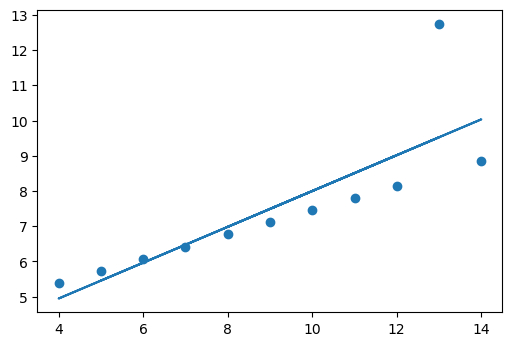

In [38]:
plotModelo(x3,y3,III,31839)

In [39]:
IV = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
IV.gradientDescent(x4, y4)

La función convergió con beta: [2.94895873 0.50513421] en la iteración 12294


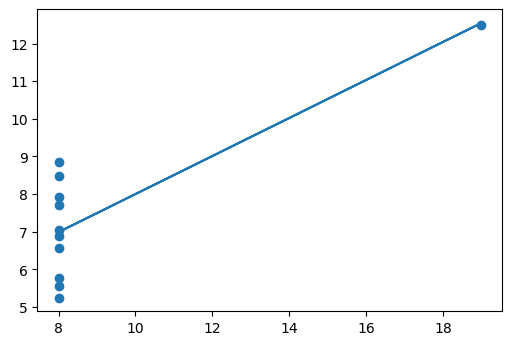

In [40]:
plotModelo(x4,y4,IV,12293)

## Problema 5

Use el archivo `radioactive_decay.dat`

In [41]:
%cat Data/radioactive_decay.txt

#time   N_(remaining)
0.0 10.48
1.0 7.54
2.0 5.49
3.0 4.02
4.0 2.74
5.0 2.02
6.0 1.50
7.0 1.09
8.0 0.68
9.0 0.57
10.0 0.37
11.0 0.31
12.0 0.19
13.0 0.15
14.0 0.13
15.0 0.11


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0, 0.5, 'N_(remaining)')

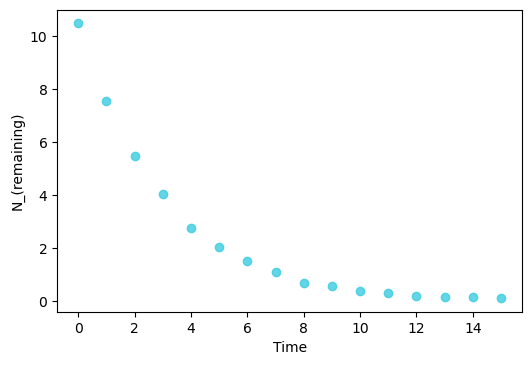

In [42]:
time, remain = np.loadtxt('Data/radioactive_decay.txt', unpack = True, dtype = float, delimiter=' ', usecols = [0,1])
plt.figure(dpi=100)
plt.subplot(1, 1, 1)

plt.scatter(time, remain, color = (.23, .8, .88), alpha = .8)
plt.xlabel('Time')
plt.ylabel('N_(remaining)')

In [43]:
radio = RegresionLineal(alpha=0.001, max_iters=1000000, tols=0.0000001)
radio.gradientDescent(time,remain)

La función convergió con beta: [ 6.42028023 -0.54578078] en la iteración 19032


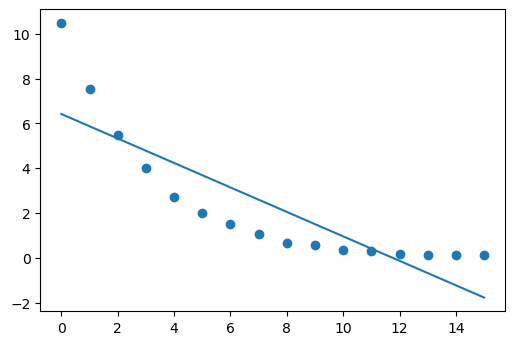

In [44]:
plotModelo(time,remain,radio,19031)

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

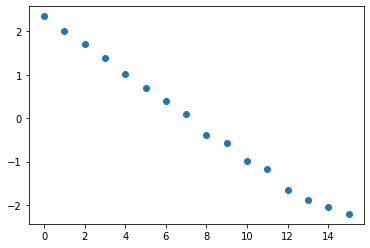

In [45]:
ln_remain = np.log(remain)
plt.scatter(time, ln_remain)

In [46]:
datos = list(zip(time, ln_remain))

In [47]:
datos

[(0.0, 2.349468678892896),
 (1.0, 2.020222182019865),
 (2.0, 1.7029282555214393),
 (3.0, 1.3912819026309295),
 (4.0, 1.007957920399979),
 (5.0, 0.7030975114131134),
 (6.0, 0.4054651081081644),
 (7.0, 0.08617769624105241),
 (8.0, -0.3856624808119846),
 (9.0, -0.5621189181535413),
 (10.0, -0.9942522733438669),
 (11.0, -1.171182981502945),
 (12.0, -1.6607312068216509),
 (13.0, -1.8971199848858813),
 (14.0, -2.0402208285265546),
 (15.0, -2.2072749131897207)]

In [49]:
np.savetxt("Data/transform_radioactive_decay.txt", datos, delimiter=" ")

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [50]:
%cat Data/transform_radioactive_decay.txt

0.000000000000000000e+00 2.349468678892896012e+00
1.000000000000000000e+00 2.020222182019864920e+00
2.000000000000000000e+00 1.702928255521439338e+00
3.000000000000000000e+00 1.391281902630929546e+00
4.000000000000000000e+00 1.007957920399978891e+00
5.000000000000000000e+00 7.030975114131133852e-01
6.000000000000000000e+00 4.054651081081643849e-01
7.000000000000000000e+00 8.617769624105241222e-02
8.000000000000000000e+00 -3.856624808119846204e-01
9.000000000000000000e+00 -5.621189181535413137e-01
1.000000000000000000e+01 -9.942522733438668991e-01
1.100000000000000000e+01 -1.171182981502945086e+00
1.200000000000000000e+01 -1.660731206821650874e+00
1.300000000000000000e+01 -1.897119984885881294e+00
1.400000000000000000e+01 -2.040220828526554619e+00
1.500000000000000000e+01 -2.207274913189720689e+00


Text(0, 0.5, 'N_(remaining)')

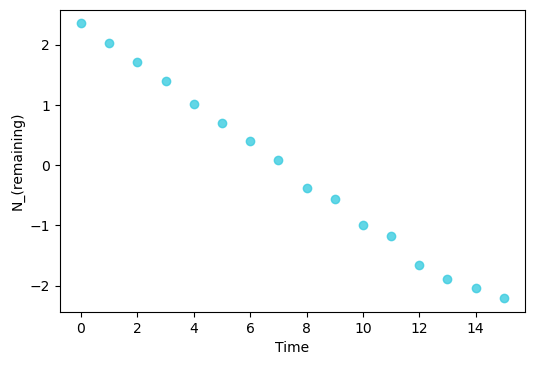

In [51]:
time, remains = np.loadtxt('Data/transform_radioactive_decay.txt', unpack = True, dtype = float, delimiter=' ', usecols = [0,1])
plt.figure(dpi=100)
plt.subplot(1, 1, 1)

plt.scatter(time, remains, color = (.23, .8, .88), alpha = .8)
plt.xlabel('Time')
plt.ylabel('N_(remaining)')

In [52]:
radios = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
radios.gradientDescent(time,remains)

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


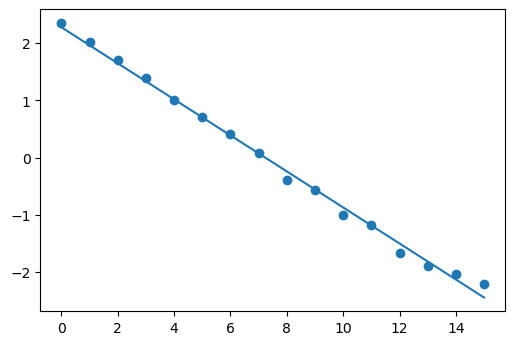

In [53]:
plotModelo(time,remains,radios,5754)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [56]:
print(radio.historia['beta'][19031])

[ 6.42027028 -0.54577981]


In [57]:
print(radios.historia['beta'][5754])

[ 2.27547178 -0.31459505]
